<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/05_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos



Link para o vídeo: https://youtu.be/d2qrsCfXung

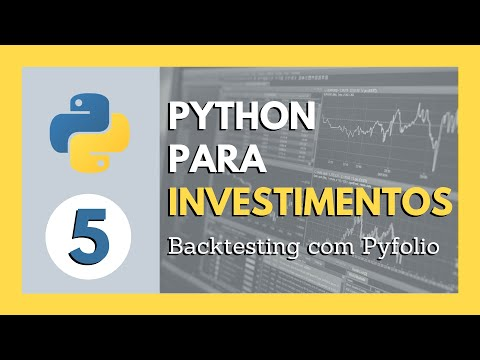

In [4]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('d2qrsCfXung', width=854, height=480)

# 1. Importando bibliotecas

In [6]:
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
#!pip install git+https://github.com/quantopian/pyfolio

In [9]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

C:\Users\usuario\anaconda3\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# 2. Obtendo e tratando os dados

In [11]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Close']


[*********************100%%**********************]  6 of 6 completed


In [12]:
dados_yahoo

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2019-06-18,14.817160,7.606233,7.017992,33.952057,9.606374,99404.0000
2019-06-19,14.940297,7.718454,6.922073,34.147938,9.853047,100303.0000
2019-06-21,15.145521,7.855613,6.946053,34.239342,9.974058,102013.0000
2019-06-24,15.022385,7.886788,6.986019,34.213230,10.043874,102062.0000
2019-06-25,14.915671,7.843145,6.770204,33.547234,9.853047,100093.0000
...,...,...,...,...,...,...
2024-06-12,11.270000,9.670000,7.050000,60.139999,38.070000,119936.0000
2024-06-13,11.090000,9.570000,7.160000,60.830002,38.419998,119568.0000
2024-06-14,11.240000,9.570000,7.180000,60.619999,38.770000,119662.0000


In [13]:
retorno = dados_yahoo.pct_change()
retorno

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2019-06-18,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-19,0.008310,0.014754,-0.013668,0.005769,0.025678,0.009044
2019-06-21,0.013736,0.017770,0.003464,0.002677,0.012282,0.017048
2019-06-24,-0.008130,0.003968,0.005754,-0.000763,0.007000,0.000480
2019-06-25,-0.007104,-0.005534,-0.030892,-0.019466,-0.018999,-0.019292
...,...,...,...,...,...,...
2024-06-12,-0.011403,-0.009221,-0.011220,-0.013775,0.007143,-0.013968
2024-06-13,-0.015972,-0.010341,0.015603,0.011473,0.009194,-0.003068
2024-06-14,0.013526,0.000000,0.002793,-0.003452,0.009110,0.000786


In [14]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2019-06-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-06-19,1.008310,1.014754,0.986332,1.005769,1.025678,1.009044
2019-06-21,1.022161,1.032786,0.989749,1.008461,1.038275,1.026246
2019-06-24,1.013850,1.036885,0.995444,1.007692,1.045543,1.026739
2019-06-25,1.006648,1.031147,0.964693,0.988077,1.025678,1.006931
...,...,...,...,...,...,...
2024-06-12,0.760605,1.271326,1.004561,1.771321,3.962994,1.206551
2024-06-13,0.748457,1.258179,1.020235,1.791644,3.999428,1.202849
2024-06-14,0.758580,1.258179,1.023085,1.785459,4.035862,1.203795


In [15]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2019-06-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-06-19,10083.104641,10147.538524,9863.324635,10057.693379,10256.781164,50408.442344,0.008169
2019-06-21,10221.608945,10327.862830,9897.494156,10084.614859,10382.750424,50914.331214,0.010036
2019-06-24,10138.504947,10368.848505,9954.441545,10076.924131,10455.426792,50994.145920,0.001568
2019-06-25,10066.484872,10311.470566,9646.925372,9880.766192,10256.781164,50162.428165,-0.016310
...,...,...,...,...,...,...,...
2024-06-12,7606.046450,12713.257566,10045.609414,17713.212367,39629.937934,87708.063731,-0.003255
2024-06-13,7484.565472,12581.785943,10202.348925,17916.440832,39994.277780,88179.418952,0.005374
2024-06-14,7585.799191,12581.785943,10230.847080,17854.588056,40358.621596,88611.641866,0.004902


# 3. Resultados

O **Sortino Ratio** é uma métrica financeira usada para avaliar o retorno ajustado ao risco de um investimento, focando apenas na volatilidade negativa. Ele é uma variação do **Sharpe Ratio**, mas ao invés de considerar toda a volatilidade (positiva e negativa), o Sortino Ratio leva em conta apenas os retornos negativos, ou seja, os riscos de perda.

O **Calmar Ratio** é uma métrica financeira usada para avaliar o desempenho de um investimento, comparando seu retorno anual médio com sua máxima perda (**drawdown**). Ele ajuda investidores a entender **quanto retorno podem esperar pelo risco que estão assumindo**.


O **Omega Ratio** é uma métrica de desempenho financeiro que avalia a relação entre ganhos e perdas de um investimento, considerando um limite de retorno desejado. Diferente de outras métricas como o Sharpe Ratio, ele leva em conta toda a distribuição dos retornos, incluindo assimetria e caudas.

**Stability**  refere-se à consistência dos retornos ao longo do tempo. Ele mede quão suave é a curva de retorno acumulado, ajudando a avaliar se uma estratégia de investimento tem um desempenho estável ou se apresenta grandes oscilações.

### Beta (β) – Medida de Risco
O Beta mede a sensibilidade de um ativo em relação ao mercado. Ele indica o quanto um ativo tende a se mover em resposta às variações do mercado.
- **Beta = 1** → O ativo se move exatamente como o mercado.
- **Beta > 1** → O ativo é mais volátil que o mercado (movimentos amplificados).
- **Beta < 1** → O ativo é menos volátil que o mercado (movimentos reduzidos).
- **Beta < 0** → O ativo se move na direção oposta ao mercado.

### Alpha (α) – Retorno em Excesso
O Alpha mede o desempenho ajustado ao risco de um ativo ou fundo de investimento. Ele indica se um ativo está superando ou ficando abaixo do retorno esperado, dado seu nível de risco.
- **Alpha positivo** → O ativo está gerando retorno acima do esperado.
- **Alpha negativo** → O ativo está performando abaixo do esperado.

Esses conceitos são amplamente utilizados na gestão de carteiras e no modelo **CAPM (Capital Asset Pricing Model)** para avaliar o retorno esperado de um investimento.

Start date,2019-06-18
End date,2024-06-18
Total months,59
,Backtest
Annual return,12.396%
Cumulative returns,77.965%
Annual volatility,27.107%
Sharpe ratio,0.57
Calmar ratio,0.32
Stability,0.43
Max drawdown,-39.178%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.18,2020-02-19,2020-03-18,2020-07-17,108
1,33.88,2021-07-28,2022-06-17,NaT,NaN
2,13.06,2019-07-10,2019-08-26,2019-11-07,87
3,12.57,2021-01-08,2021-03-24,2021-04-15,70
4,7.78,2020-10-26,2020-10-30,2020-11-05,9


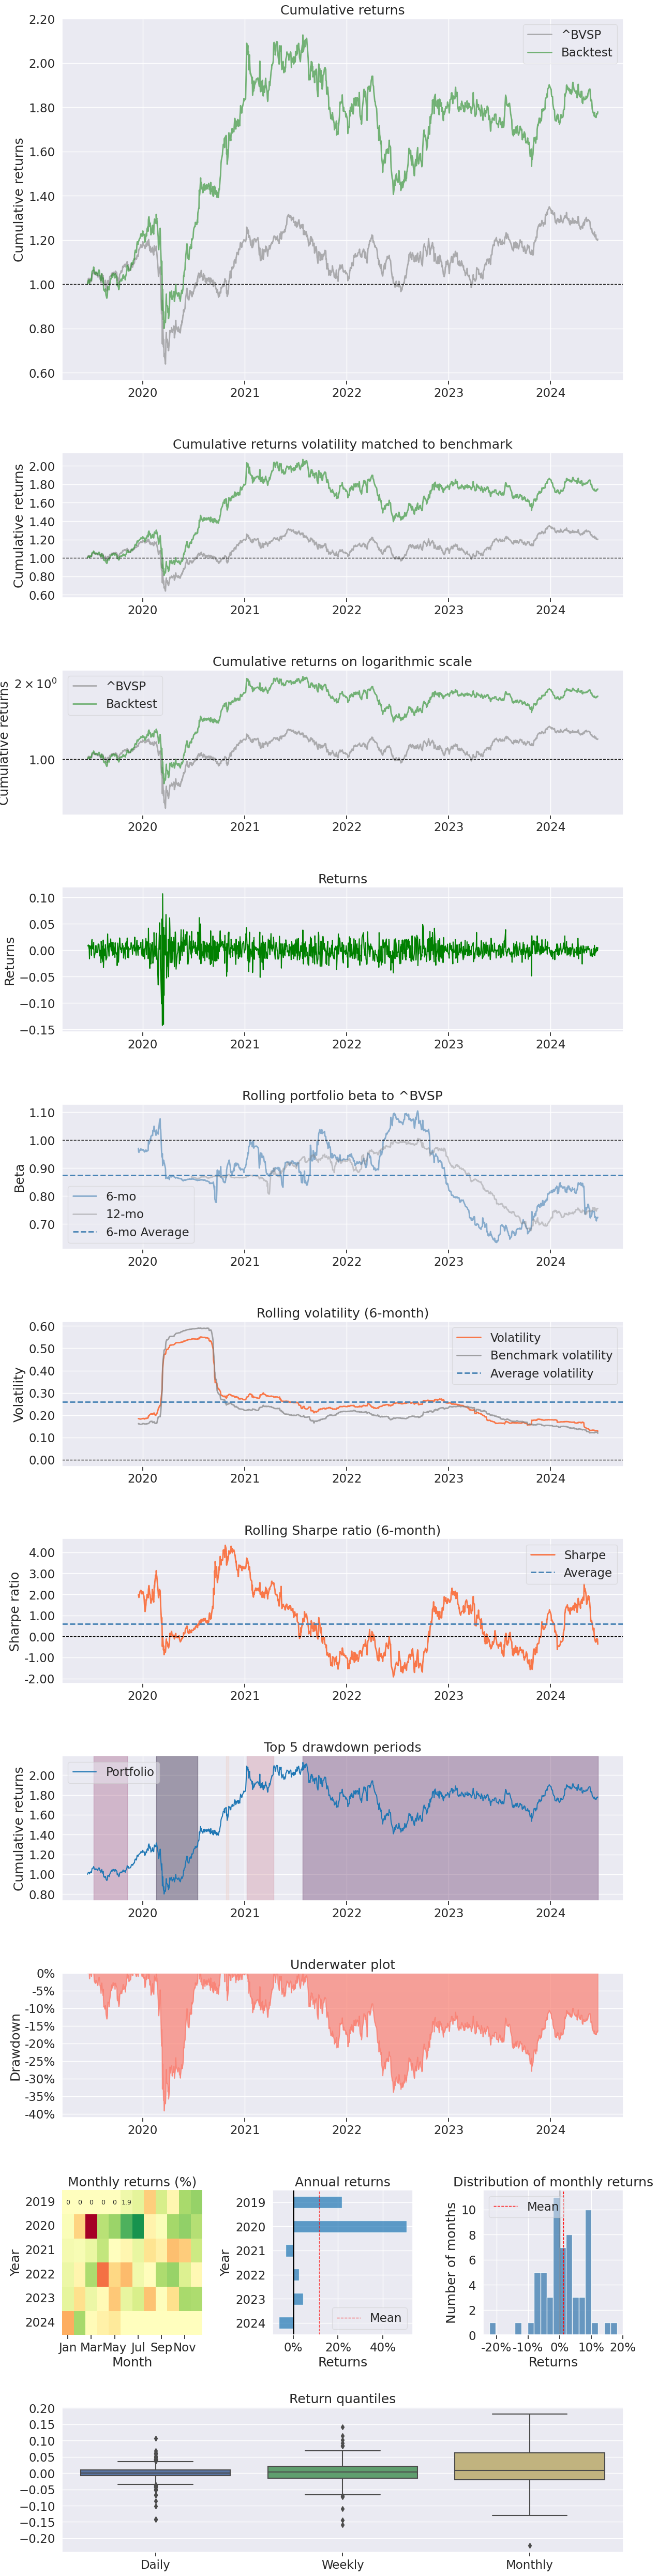

In [27]:
#  relatório detalhado de desempenho da sua carteira de investimentos usando a biblioteca Pyfolio
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


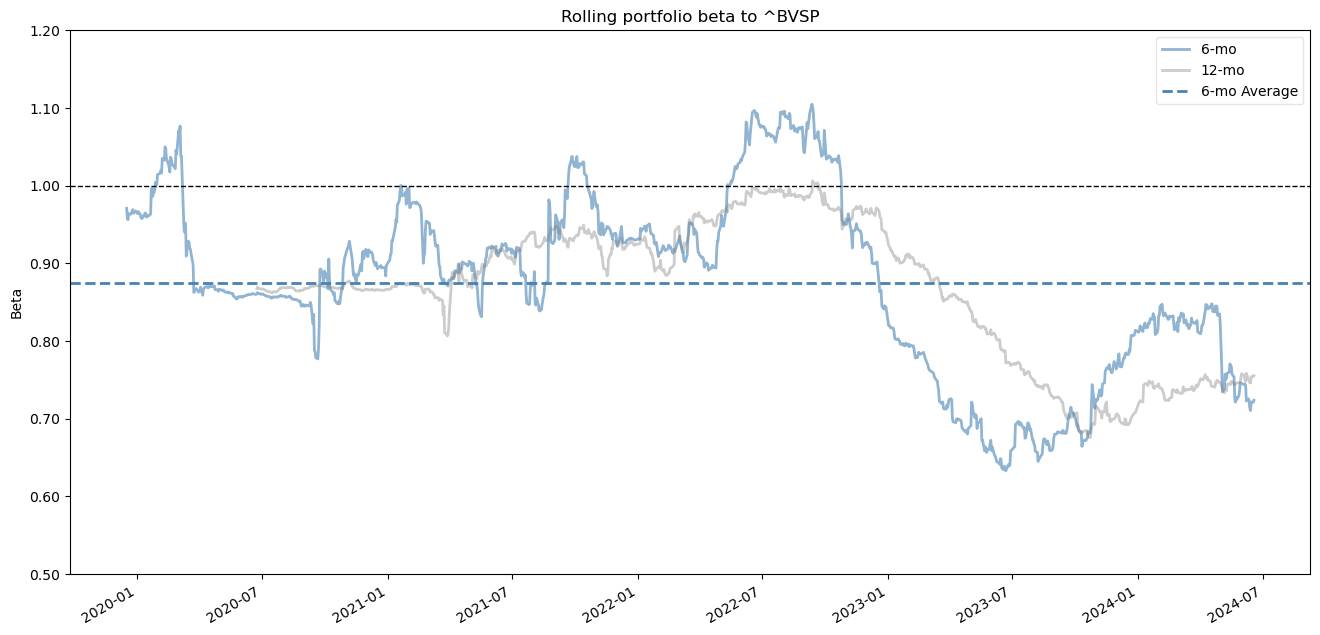

In [31]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.5, 1.2));

* https://www.suno.com.br/artigos/beta/#:~:text=O%C2%A0%C3%8Dndice%20Beta%20%C3%A9%20um%20indicador%20muito%20utilizado
* https://www.investopedia.com/terms/b/beta.asp
* https://pt.wikipedia.org/wiki/%C3%8Dndice_beta